# Handwritten Digit Recognition

## Import Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [5]:
mnist = keras.datasets.mnist
(x_train , y_train ) , (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 25s 2us/step


### Normalize Data

In [6]:
x_train , x_test = x_train / 255.0 , x_test / 255.0

In [10]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

### Display an image

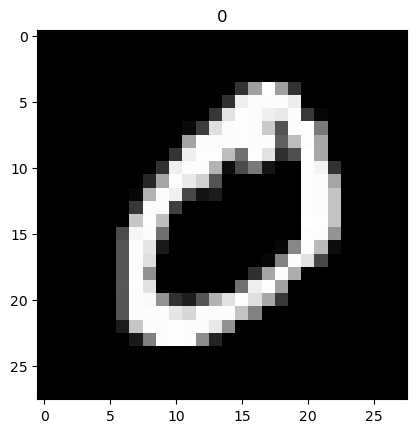

In [18]:
plt.imshow(x_train[1],cmap = 'gray')
plt.title(f"{y_train[1]}")
plt.show()

### Reshaping Data for Neural Networks

In [20]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000 , 28*28)

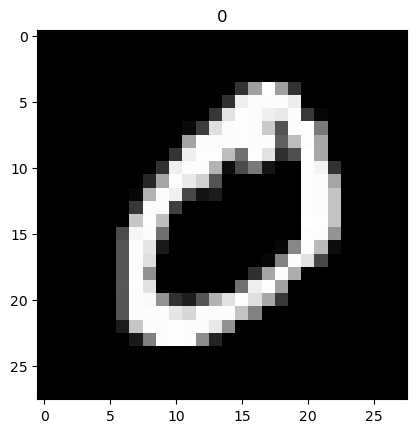

In [22]:
plt.imshow(x_train[1].reshape(28,28),cmap = 'gray',fig)
plt.title(f"{y_train[1]}")
plt.show()


### One hot encoding

In [29]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Define Neural Network Model

In [34]:
model = keras.Sequential([
    keras.layers.Input(shape=(28 * 28,)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation = 'softmax')
])

## Compile the Model

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Model

In [38]:
model.fit(x_train , y_train , epochs=10 , validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8584 - loss: 0.4872 - val_accuracy: 0.9606 - val_loss: 0.1325
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9557 - loss: 0.1498 - val_accuracy: 0.9686 - val_loss: 0.1040
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0.1092 - val_accuracy: 0.9747 - val_loss: 0.0855
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9722 - loss: 0.0873 - val_accuracy: 0.9754 - val_loss: 0.0836
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9780 - loss: 0.0700 - val_accuracy: 0.9764 - val_loss: 0.0776
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9809 - loss: 0.0607 - val_accuracy: 0.9760 - val_loss: 0.0782
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9834 - loss: 0.0529 - val_accuracy: 0.9760 - val_loss: 0.0844
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9839 - loss: 0.0487 

## Evaluate Model

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.9793 - loss: 0.0756

Test accuracy: 0.9793


## Predict

In [41]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [43]:
x_test.shape

(10000, 784)

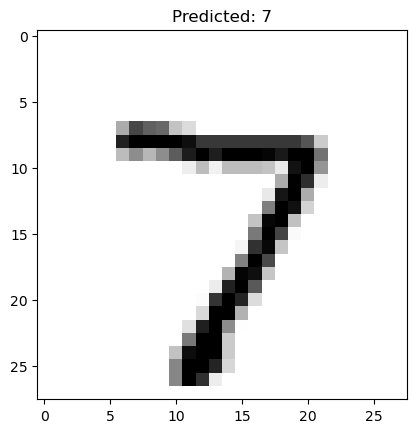

In [46]:
plt.imshow(x_test[0].reshape(28,28), cmap=plt.cm.binary)
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()


## Save model

In [53]:
model.save('digit_classifier_1.keras')

In [54]:
loaded_model = keras.models.load_model('digit_classifier_1.keras')